In [1]:
import numpy as np
import matplotlib.pyplot as plt

from interp import eval_lagrange
from hermite_int import eval_hermite
from cubic_spline_demo import create_natural_spline, eval_cubic_spline, create_clamped_spline

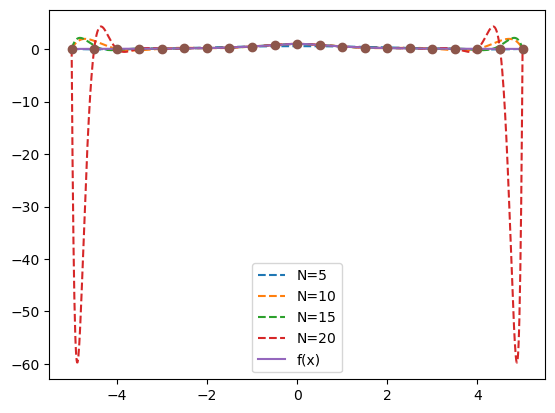

In [11]:
a = -5
b = 5
f = lambda x: 1/(1+x**2)
fp = lambda x: -2*x/(1.+x**2)**2
fp0 = 5/338
fpN = -5/338

# evaluation points
Neval = 1000
xeval = np.linspace(a, b, Neval+1)
yeval = f(xeval)

for n in [5,10,15,20]:
    # interpolating nodes
    xint = np.linspace(a, b, n+1)
    yint = f(xint)
    ypint = fp(xint)
    lag = np.zeros(Neval+1)
    herm = np.zeros(Neval+1)
    (M,C,D) = create_natural_spline(yint, xint, n)
    cubic = eval_cubic_spline(xeval, Neval, xint, n, M, C, D)
    (M,C,D) = create_clamped_spline(yint, xint, n, fp0, fpN)
    clamped = eval_cubic_spline(xeval, Neval, xint, n, M, C, D)
    for i in range(Neval+1):
        lag[i] = eval_lagrange(xeval[i], xint, yint, n)
        herm[i] = eval_hermite(xeval[i], xint, yint, ypint, n)
    # plt.semilogy(xeval, np.abs(clamped-yeval), label=f'N={n}')
    plt.plot(xeval, lag, label=f'N={n}', linestyle='--')
plt.plot(xeval, yeval, label='f(x)')
plt.plot(xint, yint, marker='o', linestyle='none')
plt.legend()
plt.show()

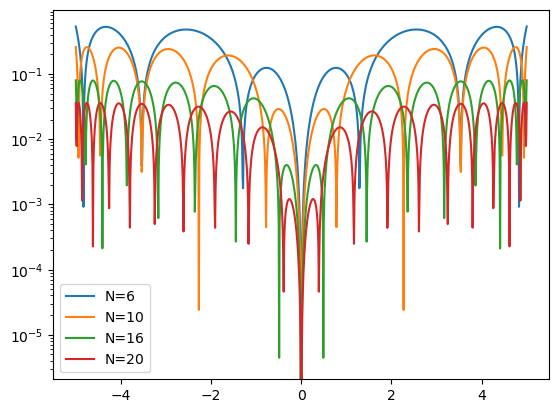

In [48]:
a = -5
b = 5
f = lambda x: 1/(1+x**2)
fp = lambda x: -2*x/(1.+x**2)**2
fp0 = 5/338
fpN = -5/338

# evaluation points
Neval = 1000
xeval = np.linspace(a, b, Neval+1)
yeval = f(xeval)

for n in [6,10,16,20]:
    # interpolating nodes
    xint = []
    for j in range(1, n+1):
        x_j = np.cos((((2*j)-1)*np.pi)/(2*n))
        xint.append(5 * x_j)
    xint.append(0)
    xint = np.array(xint)
    xint = np.sort(xint)
    yint = f(xint)
    ypint = fp(xint)
    lag = np.zeros(Neval+1)
    herm = np.zeros(Neval+1)
    (M,C,D) = create_natural_spline(yint, xint, n)
    cubic = eval_cubic_spline(xeval, Neval, xint, n, M, C, D)
    (M,C,D) = create_clamped_spline(yint, xint, n, fp0, fpN)
    clamped = eval_cubic_spline(xeval, Neval, xint, n, M, C, D)
    for i in range(Neval+1):
        lag[i] = eval_lagrange(xeval[i], xint, yint, n)
        herm[i] = eval_hermite(xeval[i], xint, yint, ypint, n)
    plt.semilogy(xeval, np.abs(lag-yeval), label=f'N={n}')
    # plt.plot(xeval, cubic, label=f'N={n}', linestyle='--')
# plt.plot(xeval, yeval, label='f(x)')
plt.legend()
plt.show()